In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pendulum

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statistics 
import yfinance as yf
import pendulum 
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
tickers_list=['WIPRO.NS','TCS.NS','^NSEI']

In [6]:

wk_data=yf.download(tickers=['WIPRO.NS','TCS.NS','^NSEI'],start='2010-01-01',end='2023-01-01' ,interval="1wk")['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [7]:
wk_data

,TCS.NS,WIPRO.NS,^NSEI
Date,,,
2009-12-28,285.091156,133.971649,NaN
2010-01-04,266.435303,131.617279,5244.750000
2010-01-11,301.310242,144.984894,5252.200195
2010-01-18,288.536682,137.921875,5036.000000
2010-01-25,280.293976,127.657249,4882.049805
...,...,...,...
2022-11-28,3328.691895,411.386719,18696.099609
2022-12-05,3186.993652,393.081787,18496.599609
2022-12-12,3136.179932,388.792389,18269.000000


In [8]:
wk_data.dropna(how='any',inplace=True)

In [9]:
wk_data.rename(columns={'WIPRO.NS': 'WIPRO','TCS.NS':'TCS','^NSEI':'NIFTY 50'},inplace=True)
wk_data

,TCS,WIPRO,NIFTY 50
Date,,,
2010-01-04,266.435303,131.617279,5244.750000
2010-01-11,301.310242,144.984894,5252.200195
2010-01-18,288.536682,137.921875,5036.000000
2010-01-25,280.293976,127.657249,4882.049805
2010-02-01,276.189178,126.888863,4718.649902
...,...,...,...
2022-11-28,3328.691895,411.386719,18696.099609
2022-12-05,3186.993652,393.081787,18496.599609
2022-12-12,3136.179932,388.792389,18269.000000


In [11]:
wk_data[['Nifty50WeeklyReturns','TcsWeeklyReturns','WiproWeeklyReturns',]]=wk_data.iloc[:,0:3].pct_change()

In [12]:
wk_data

,TCS,WIPRO,NIFTY 50,Nifty50WeeklyReturns,TcsWeeklyReturns,WiproWeeklyReturns
Date,,,,,,
2010-01-04,266.435303,131.617279,5244.750000,NaN,NaN,NaN
2010-01-11,301.310242,144.984894,5252.200195,0.130895,0.101564,0.001421
2010-01-18,288.536682,137.921875,5036.000000,-0.042393,-0.048716,-0.041164
2010-01-25,280.293976,127.657249,4882.049805,-0.028567,-0.074423,-0.030570
2010-02-01,276.189178,126.888863,4718.649902,-0.014645,-0.006019,-0.033470
...,...,...,...,...,...,...
2022-11-28,3328.691895,411.386719,18696.099609,0.014603,0.023833,0.009904
2022-12-05,3186.993652,393.081787,18496.599609,-0.042569,-0.044496,-0.010671
2022-12-12,3136.179932,388.792389,18269.000000,-0.015944,-0.010912,-0.012305


In [13]:
wk_data.dropna(how='any',inplace=True)

In [14]:
wk_data

,TCS,WIPRO,NIFTY 50,Nifty50WeeklyReturns,TcsWeeklyReturns,WiproWeeklyReturns
Date,,,,,,
2010-01-11,301.310242,144.984894,5252.200195,0.130895,0.101564,0.001421
2010-01-18,288.536682,137.921875,5036.000000,-0.042393,-0.048716,-0.041164
2010-01-25,280.293976,127.657249,4882.049805,-0.028567,-0.074423,-0.030570
2010-02-01,276.189178,126.888863,4718.649902,-0.014645,-0.006019,-0.033470
2010-02-08,283.518494,129.184128,4826.850098,0.026537,0.018089,0.022930
...,...,...,...,...,...,...
2022-11-28,3328.691895,411.386719,18696.099609,0.014603,0.023833,0.009904
2022-12-05,3186.993652,393.081787,18496.599609,-0.042569,-0.044496,-0.010671
2022-12-12,3136.179932,388.792389,18269.000000,-0.015944,-0.010912,-0.012305


In [15]:
#monthly prices data
mo_data=yf.download(tickers=['WIPRO.NS','TCS.NS','^NSEI'],start='2010-01-01',end='2023-01-01',interval="1mo")['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [16]:
mo_data.rename(columns={'WIPRO.NS': 'WIPRO','TCS.NS':'TCS','^NSEI':'NIFTY 50'},inplace=True)

In [17]:
mo_data

,TCS,WIPRO,NIFTY 50
Date,,,
2010-01-01,280.293976,127.657249,4882.049805
2010-02-01,290.809784,133.479095,4922.299805
2010-03-01,298.005524,139.281250,5249.100098
2010-04-01,292.183990,132.296997,5278.000000
2010-05-01,283.652130,131.932495,5086.299805
...,...,...,...
2022-08-01,3099.991699,412.533875,17759.300781
2022-09-01,2900.543213,393.281311,17094.349609
2022-10-01,3082.614502,385.600220,18012.199219


In [18]:
mo_data['TcsMonthlyReturns']=mo_data['TCS'].pct_change()
mo_data['WiproMonthlyReturns']=mo_data['WIPRO'].pct_change()
mo_data['Nifty50MonthlyReturns']= mo_data['NIFTY 50'].pct_change()

In [19]:
mo_data

,TCS,WIPRO,NIFTY 50,TcsMonthlyReturns,WiproMonthlyReturns,Nifty50MonthlyReturns
Date,,,,,,
2010-01-01,280.293976,127.657249,4882.049805,NaN,NaN,NaN
2010-02-01,290.809784,133.479095,4922.299805,0.037517,0.045605,0.008244
2010-03-01,298.005524,139.281250,5249.100098,0.024744,0.043469,0.066392
2010-04-01,292.183990,132.296997,5278.000000,-0.019535,-0.050145,0.005506
2010-05-01,283.652130,131.932495,5086.299805,-0.029200,-0.002755,-0.036321
...,...,...,...,...,...,...
2022-08-01,3099.991699,412.533875,17759.300781,-0.024917,-0.023956,0.035030
2022-09-01,2900.543213,393.281311,17094.349609,-0.064338,-0.046669,-0.037442
2022-10-01,3082.614502,385.600220,18012.199219,0.062771,-0.019531,0.053693


In [20]:
mo_data.dropna(how="any",inplace=True)

In [21]:
mo_data

,TCS,WIPRO,NIFTY 50,TcsMonthlyReturns,WiproMonthlyReturns,Nifty50MonthlyReturns
Date,,,,,,
2010-02-01,290.809784,133.479095,4922.299805,0.037517,0.045605,0.008244
2010-03-01,298.005524,139.281250,5249.100098,0.024744,0.043469,0.066392
2010-04-01,292.183990,132.296997,5278.000000,-0.019535,-0.050145,0.005506
2010-05-01,283.652130,131.932495,5086.299805,-0.029200,-0.002755,-0.036321
2010-06-01,286.686951,126.255157,5312.500000,0.010699,-0.043032,0.044472
...,...,...,...,...,...,...
2022-08-01,3099.991699,412.533875,17759.300781,-0.024917,-0.023956,0.035030
2022-09-01,2900.543213,393.281311,17094.349609,-0.064338,-0.046669,-0.037442
2022-10-01,3082.614502,385.600220,18012.199219,0.062771,-0.019531,0.053693


In [22]:
print("Expected monthly returns of TCS")
round(mo_data['TcsMonthlyReturns'].mean(),5)

Expected monthly returns of TCS


0.01778

In [23]:
print("Expected monthly returns of WIPRO")
round(mo_data['WiproMonthlyReturns'].mean(),5)

Expected monthly returns of WIPRO


0.01018

In [38]:
print("Expected monthly returns of NIFTY 50")
round(mo_data['Nifty50MonthlyReturns'].mean(),5)

Expected monthly returns of NIFTY 50


0.00974

In [25]:
print("Expected risk associated with TCS")
round(mo_data['TcsMonthlyReturns'].std(),5)

Expected risk associated with TCS


0.06536

In [26]:
print("Expected risk associated with WIPRO")
round(mo_data['WiproMonthlyReturns'].std(),5)

Expected risk associated with WIPRO


0.07745

In [37]:
print("Expected risk associated with NIFTY50")
round(mo_data['Nifty50MonthlyReturns'].std(),5)

Expected risk associated with NIFTY50


0.04981

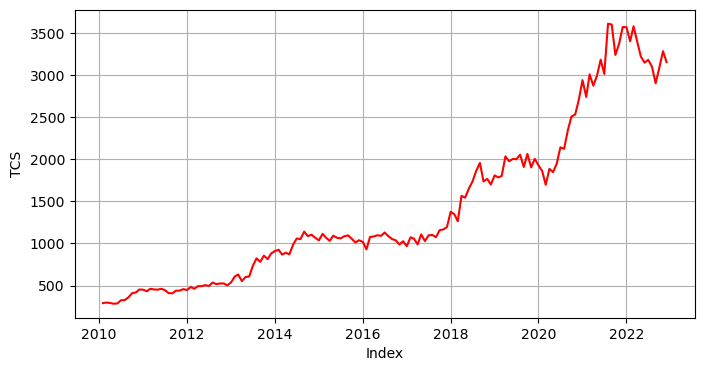

In [28]:
plt.figure(figsize=(8,4))
plt.plot(mo_data.index, mo_data['TCS'], color='r')
plt.ylabel("TCS")
plt.xlabel("Index")
plt.grid(True)
plt.show()

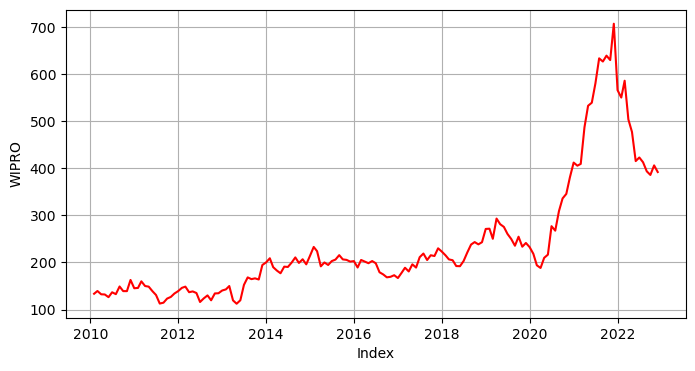

In [29]:
plt.figure(figsize=(8,4))
plt.plot(mo_data.index, mo_data['WIPRO'], color='r')
plt.ylabel("WIPRO")
plt.xlabel("Index")
plt.grid(True)
plt.show()

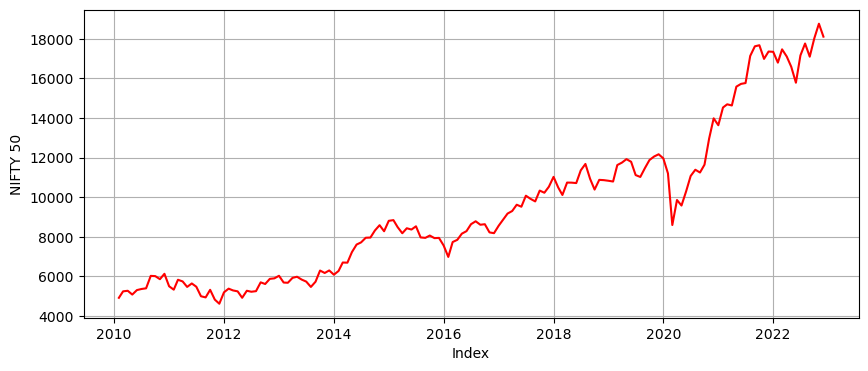

In [30]:
plt.figure(figsize=(10,4))
plt.plot(mo_data.index, mo_data['NIFTY 50'], color='r')
plt.ylabel("NIFTY 50")
plt.xlabel("Index")
plt.grid(True)
plt.show()

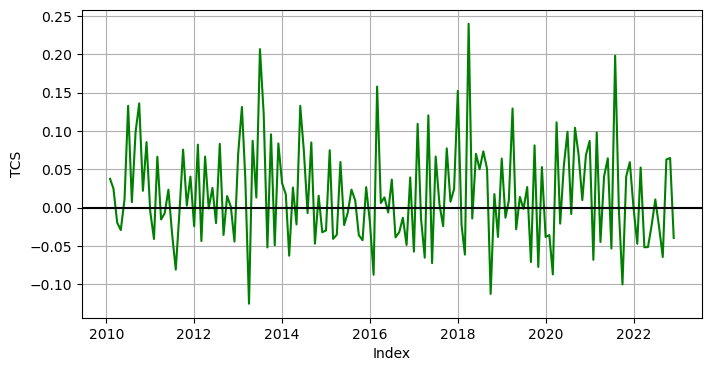

In [31]:
#Return on Investment

plt.figure(figsize=(8,4))
plt.plot(mo_data.index, mo_data['TcsMonthlyReturns'], color='g')
plt.ylabel("TCS")
plt.xlabel("Index")
plt.axhline(y=0,color='black')
plt.grid(True)
plt.show()

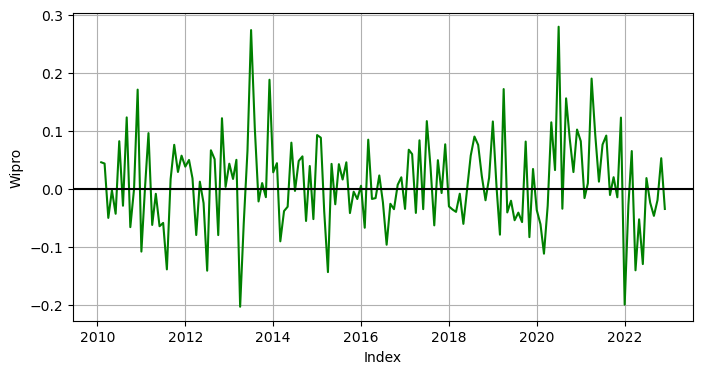

In [32]:
#Return on Investment

plt.figure(figsize=(8,4))
plt.plot(mo_data.index, mo_data['WiproMonthlyReturns'], color='g')
plt.ylabel("Wipro")
plt.xlabel("Index")
plt.axhline(y=0,color='black')
plt.grid(True)
plt.show()

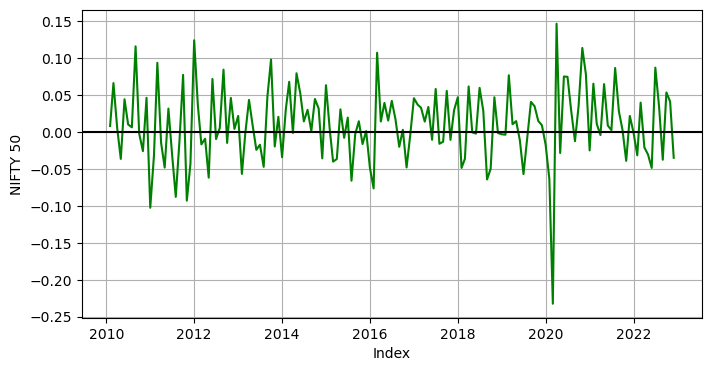

In [36]:
#Return on Investment

plt.figure(figsize=(8,4))
plt.plot(mo_data.index, mo_data['Nifty50MonthlyReturns'], color='g')
plt.ylabel("NIFTY 50")
plt.xlabel("Index")
plt.axhline(y=0,color='black')
plt.grid(True)
plt.show()

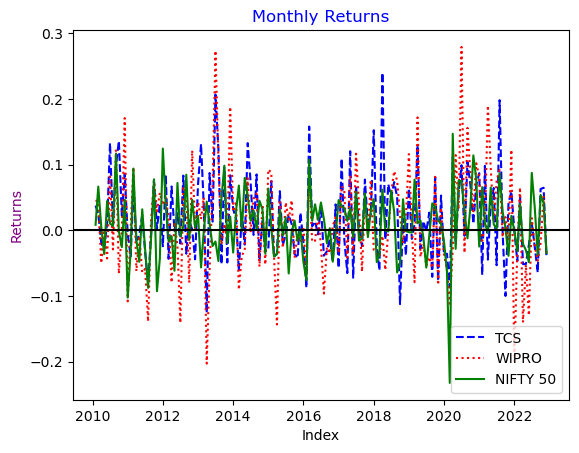

In [35]:
font1 = {'family':'Verdana','color':'b','size':12}
font2 = {'family':'Verdana','color':'purple','size':10}
font3 = {'family':'Verdana','color':'green','size':10}
plt.plot(mo_data['TcsMonthlyReturns'],'b--',label="TCS")
plt.plot(mo_data['WiproMonthlyReturns'],'r',label="WIPRO",linestyle='dotted')
plt.plot(mo_data['Nifty50MonthlyReturns'],'g',label="NIFTY 50")
plt.title('Monthly Returns',fontdict=font1)
plt.legend(loc='lower right')
plt.axhline(y=0,color='black')
plt.xlabel("Index")
plt.ylabel("Returns",fontdict=font2)
plt.show()